# Imports

In [337]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import svm
from pprint import pprint

# Dataset

In [338]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset.csv')
print('Data set shape:', df.shape)

Data set shape: (1477, 28)


In [339]:
# Display the first few rows of the DataFrame
df.head()

,Body_Level,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,...,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,BMI
0,3,1,0.646666,0.690578,1.016135,1,-0.199318,0.236558,0,0.402155,...,0,0,1,0,1,0,0,0,0,0.823278
1,3,1,-0.649582,-0.003364,0.686578,1,0.428856,-1.026715,0,-1.792121,...,0,0,1,0,0,0,0,1,0,0.806112
2,3,0,-0.537725,0.493657,1.790354,1,1.069487,1.401741,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.751663
3,3,0,-1.291128,-0.545353,-0.036499,1,0.986227,-1.620907,0,0.402155,...,0,0,1,0,0,0,0,1,0,0.219426
4,3,0,0.270463,-0.818715,0.951256,1,1.069487,0.974150,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.574457


In [340]:
#Label percentages
df['Body_Level'].value_counts(normalize=True)

3    0.460393
2    0.274882
1    0.136087
0    0.128639
Name: Body_Level, dtype: float64

In [341]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Body_Level', axis=1), df['Body_Level'], test_size=0.2, random_state=100, stratify=df['Body_Level'])
# Print the shapes of the training and test sets
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (1181, 27)
Test set shape: (296, 27)


In [342]:
#Label percentages
Y_train.value_counts(normalize=True)

3    0.460627
2    0.274344
1    0.136325
0    0.128704
Name: Body_Level, dtype: float64

In [343]:
#Label percentages
Y_test.value_counts(normalize=True)

3    0.459459
2    0.277027
1    0.135135
0    0.128378
Name: Body_Level, dtype: float64

# Common Functions

In [344]:
def apply_crossvalidation(model, X_train, Y_train, k=5):

    # create a k-fold cross-validation iterator
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # perform k-fold cross-validation and compute accuracy
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
    # print the average accuracy score and its standard deviation
    print('Accuracy: {} +/- {}'.format(scores.mean(), scores.std()))

    # perform k-fold cross-validation and compute F1-score
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='f1_weighted')
    # print the average F1-score and its standard deviation
    print('F1-score: {} +/- {}'.format(scores.mean(), scores.std()))

In [345]:
def Evaluate(model, X_test, Y_test):
    
    # predict the class labels for the test set
    y_pred = model.predict(X_test)

    # calculate the accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    # calculate the precision
    precision = precision_score(Y_test, y_pred, average='weighted')

    # calculate the recall
    recall = recall_score(Y_test, y_pred, average='weighted')

    # calculate the F1 score
    f1 = f1_score(Y_test, y_pred, average='weighted')

    # calculate the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # print the results
    print('Accuracy: {}'.format(accuracy))
    print('weighted F1 score: {}'.format(f1))
    print('weighted Precision: {}'.format(precision))
    print('weighted Recall: {}'.format(recall))
    print('Confusion matrix:\n', cm)

# Analysis With BMI feature

## Random Forest

simple fit and evaluate

In [346]:
# Create a random forest object
rf_base = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_base.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [347]:
# Predict the labels of the test set
y_pred = rf_base.predict(X_test)

# Evaluate the model
Evaluate(rf_base, X_test, Y_test)

Accuracy: 1.0
weighted F1 score: 1.0
weighted Precision: 1.0
weighted Recall: 1.0
Confusion matrix:
 [[ 38   0   0   0]
 [  0  40   0   0]
 [  0   0  82   0]
 [  0   0   0 136]]


In [348]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Hyperparameter Tuning

- normally we would do a random search to narrow down the range of hyperparameters and then do a grid search to find the best hyperparameters
- since the model already has a good performance, we will just do a grid search

In [362]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt', 'auto', 'log2', 1, 5], #
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [10, 100] # 
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [363]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['sqrt', 'auto', 'log2', 1, 5],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [10, 100]},
             verbose=2)

In [366]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [367]:
best_grid = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_grid.fit(X_train, Y_train)
Evaluate(best_grid, X_test, Y_test)

Accuracy: 1.0
weighted F1 score: 1.0
weighted Precision: 1.0
weighted Recall: 1.0
Confusion matrix:
 [[ 38   0   0   0]
 [  0  40   0   0]
 [  0   0  82   0]
 [  0   0   0 136]]


save best model

In [368]:
# Save the model as a pickle file
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_grid, file)

In [369]:
# Load the model from the pickle file
with open('model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

# Evaluate the loaded model
Evaluate(rf_loaded, X_test, Y_test)

Accuracy: 1.0
weighted F1 score: 1.0
weighted Precision: 1.0
weighted Recall: 1.0
Confusion matrix:
 [[ 38   0   0   0]
 [  0  40   0   0]
 [  0   0  82   0]
 [  0   0   0 136]]


learning curve

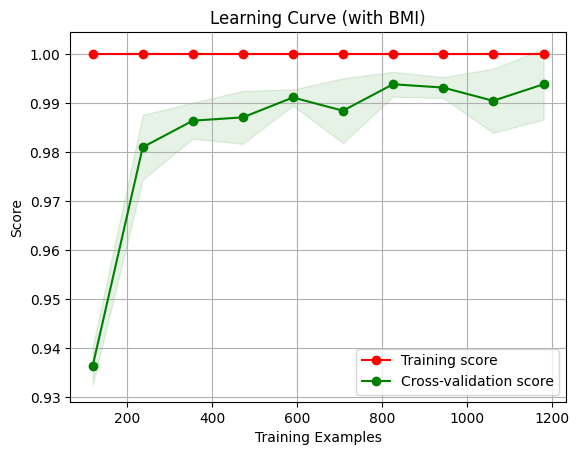

In [370]:
from sklearn.model_selection import learning_curve

# Load the data
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

# Create a random forest classifier
model = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Define the number of training samples at each iteration
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (with BMI)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the shaded area indicating the variance (± one standard deviation)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()


bias variance analysis

In [371]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp

# Create a random forest classifier
model = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Calculate bias and variance
mse, bias, variance = bias_variance_decomp(model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=42)

print("Mean Squared Error:", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error: 0.00650337837837838
Bias: 0.003060219594594594
Variance: 0.0034431587837837835


# Analysis without BMI feature

In [382]:
# Create new train and test splits without BMI
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Body_Level', 'BMI'], axis=1), df['Body_Level'], test_size=0.2, random_state=42, stratify=df['Body_Level'])

## Random Forest

simple fit and evaluate

In [383]:
# Create a random forest object
rf_base = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_base.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [384]:
# Predict the labels of the test set
y_pred = rf_base.predict(X_test)

# Evaluate the model
Evaluate(rf_base, X_test, Y_test)

Accuracy: 0.9425675675675675
weighted F1 score: 0.9423784572056372
weighted Precision: 0.9435811836738044
weighted Recall: 0.9425675675675675
Confusion matrix:
 [[ 37   1   0   0]
 [  1  31   8   0]
 [  0   3  79   0]
 [  0   2   2 132]]


In [385]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Hyperparameter Tuning

- normally we would do a random search to narrow down the range of hyperparameters and then do a grid search to find the best hyperparameters
- since the model already has a good performance, we will just do a grid search

In [386]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt', 'auto', 'log2'], #
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100, 200, 400, 800, 1000]  #
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [387]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 400, 800, 1000]},
             verbose=2)

In [388]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [389]:
best_grid = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_grid.fit(X_train, Y_train)
Evaluate(best_grid, X_test, Y_test)

Accuracy: 0.9459459459459459
weighted F1 score: 0.946327724312799
weighted Precision: 0.9472030169704589
weighted Recall: 0.9459459459459459
Confusion matrix:
 [[ 37   1   0   0]
 [  1  33   6   0]
 [  0   4  78   0]
 [  0   2   2 132]]


learning curve

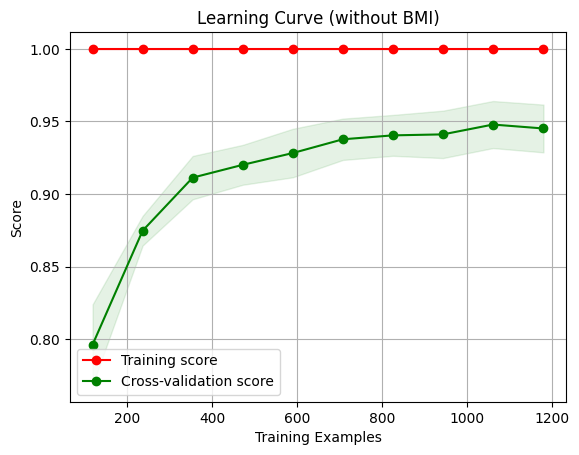

In [390]:
from sklearn.model_selection import learning_curve

# Load the data and drop BMI feature
X = df.drop(['Body_Level', 'BMI'], axis=1)
y = df['Body_Level']

# Create a random forest classifier
model = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Define the number of training samples at each iteration
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (without BMI)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the shaded area indicating the variance (± one standard deviation)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

bias variance analysis

In [391]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp

# Create a random forest classifier
model = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Calculate bias and variance
mse, bias, variance = bias_variance_decomp(model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=42)

print("Mean Squared Error:", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error: 0.08721283783783783
Bias: 0.06663775337837838
Variance: 0.02057508445945946
